In [1]:
import numpy as np
import pandas as pd

---
# Import data

In [75]:
dataset = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
dataset.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


## Clean and organize dataset

+ ### Organize the dataset

    Organize the columns, remove some not useful data, rename the columns and convert each column to your correct unit.

+ ### Date-time columns

    Working with date-time date requires to change the index DataFrame to the column that contain Date-Time values


In [76]:
'''Organize'''
# Drop the column '0'
dataset = dataset.drop(columns=0)

# Rename columns
dataset = dataset.rename(columns={0:"ID", 1:"Date-Time",2:"Flow[veh/h.lane]", 3:"Speed[km/h]" })

# Calculate the Flow rate
dataset["Flow[veh/h.lane]"] = dataset["Flow[veh/h.lane]"] * 60 / 5 / 2 # two lanes

# Calculate the Density
dataset["Density[veh/km.lane]"] = dataset["Flow[veh/h.lane]"] / dataset['Speed[km/h]']

# Convert to Datetime
dataset['Date-Time'] = pd.to_datetime(dataset['Date-Time'], format='%d/%m/%Y %H:%M')

'''Date-time column index'''
dataset.set_index('Date-Time',inplace=True)
dataset.head()

,Flow[veh/h.lane],Speed[km/h],Density[veh/km.lane]
Date-Time,,,
2011-09-01 00:00:00,222.0,89.0,2.494382
2011-09-01 00:05:00,288.0,82.0,3.512195
2011-09-01 00:10:00,156.0,85.0,1.835294
2011-09-01 00:15:00,282.0,81.0,3.481481
2011-09-01 00:20:00,312.0,82.0,3.804878


+ ### Missing values

    Verifying some missing values in dataset


In [77]:
dataset.isna().sum()

Flow[veh/h.lane]         0
Speed[km/h]              1
Density[veh/km.lane]    39
dtype: int64

In [78]:
dataset = dataset.fillna(0.0)
dataset.isna().sum()

Flow[veh/h.lane]        0
Speed[km/h]             0
Density[veh/km.lane]    0
dtype: int64

---
# Plotting

## Plotting 2D with Pandas
+ The examples followed the tutorial on [Our Coding Club](https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html)

In [79]:
import matplotlib.pyplot as plt

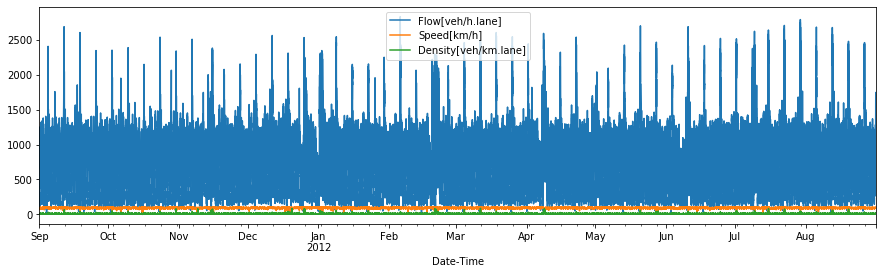

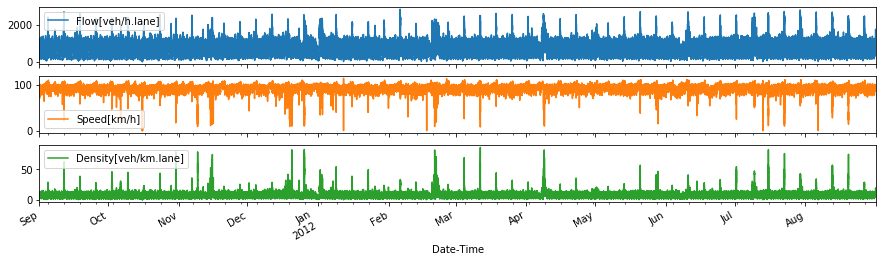

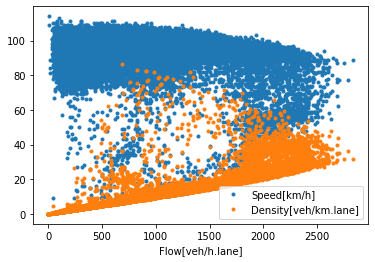

In [91]:
#Plot everythin in the same graph
dataset.plot(figsize=(15,4))

# Plot each variable in a different graph but all sharing the x axis
dataset.plot(subplots=True, figsize=(15,4))

# Plotting two variables against one of the others
dataset.plot(x='Flow[veh/h.lane]', y=['Speed[km/h]', 'Density[veh/km.lane]'], style='.')


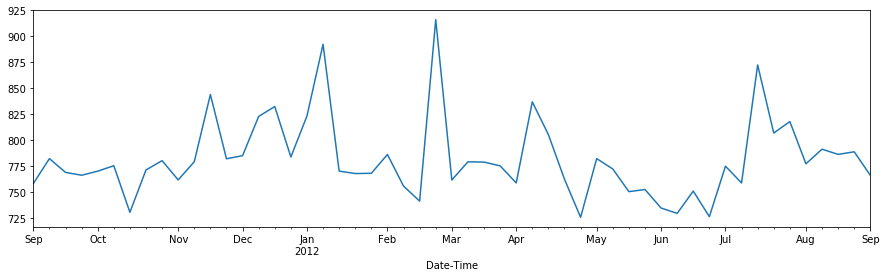

In [106]:
# Plotting aggregating data with 'resample' function
dataset['Flow[veh/h.lane]'].resample('W').mean().plot(figsize=(15,4))

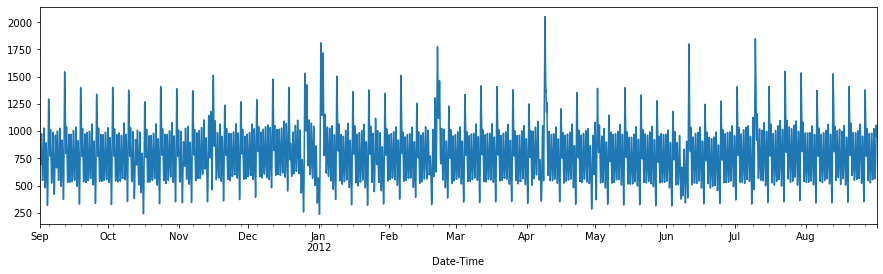

In [107]:
# Using a window 'rolling' by data - like a moving mean
dataset['Flow[veh/h.lane]'].rolling(24*7).mean().plot(figsize=(15,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002201EC1AFA0>,
      dtype=object)

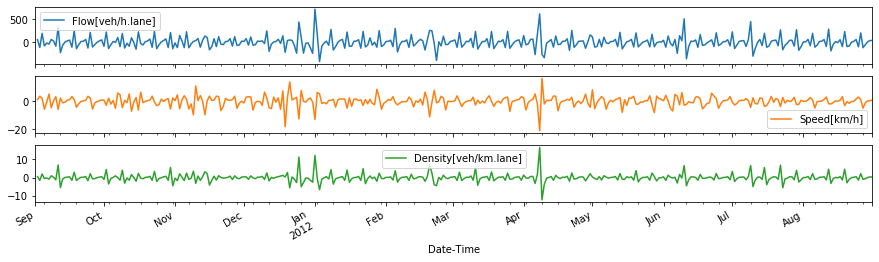

In [108]:
# Plotting the difference with relation to the mean of each variable
dataset.resample('D').mean().diff().plot(figsize=(15,4), subplots=True)

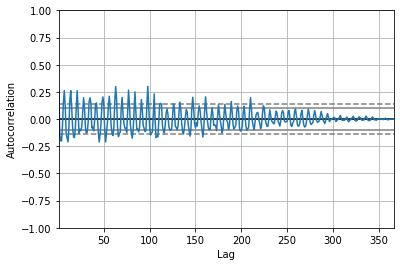

In [118]:
# Identifying periodicity and correlation
pd.plotting.autocorrelation_plot(dataset['Speed[km/h]'].resample('D').mean())

## Plotting 3D
+ The examples were coded in [machineLearningmastery](https://machinelearningmastery.com/time-series-data-visualization-with-python/)

In [245]:
groups = dataset.resample('D')

In [246]:
len(groups)

366

In [250]:
varname = 'Density[veh/km.lane]'
days = pd.DataFrame()
for name, group in groups:
    days[name] = group[varname].values

#days.T

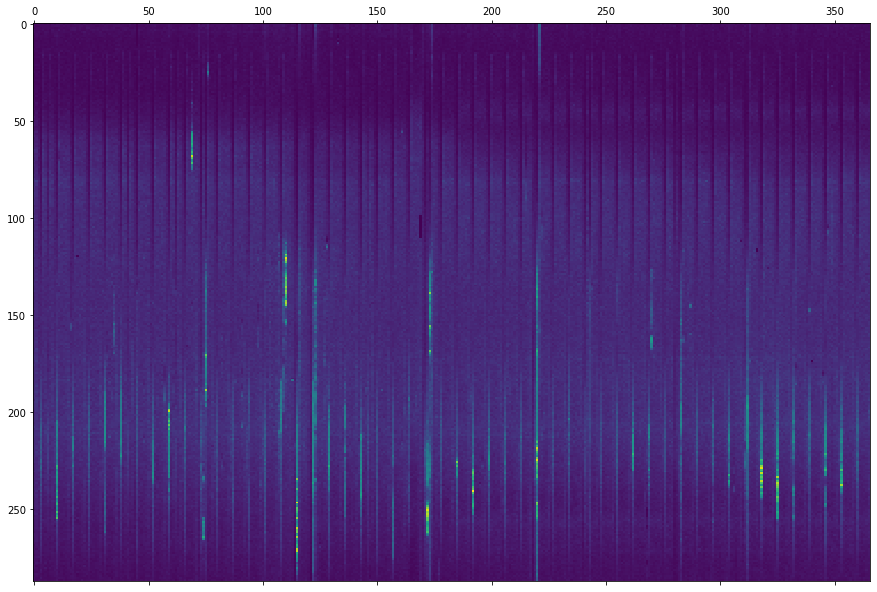

In [251]:
plt.figure(figsize=(15,10))
plt.matshow(days, interpolation=None, aspect='auto', fignum=1)
plt.show()

In [252]:
days

,2011-09-01,2011-09-02,2011-09-03,2011-09-04,2011-09-05,2011-09-06,2011-09-07,2011-09-08,2011-09-09,2011-09-10,...,2012-08-22,2012-08-23,2012-08-24,2012-08-25,2012-08-26,2012-08-27,2012-08-28,2012-08-29,2012-08-30,2012-08-31
0,2.494382,2.894118,3.133333,2.679612,2.941176,2.093023,2.769231,1.826087,3.573034,2.680851,...,3.370787,2.581395,2.674699,2.783505,2.872340,3.000000,2.470588,1.977273,2.359551,3.241379
1,3.512195,2.023256,2.210526,2.613861,2.660377,2.850000,2.750000,2.514286,3.418605,3.733333,...,3.542169,3.139535,3.133333,4.451613,3.375000,3.207921,2.666667,3.388235,3.317647,2.551724
2,1.835294,2.863636,2.739130,1.823529,2.504854,2.600000,2.831461,2.387755,2.666667,2.200000,...,3.105882,2.561798,4.200000,2.680851,2.804348,2.628571,2.206897,2.857143,2.866667,2.804348
3,3.481481,2.696629,2.632653,2.352941,3.588235,2.285714,2.744681,1.440000,4.153846,2.769231,...,2.965517,2.341463,2.590909,2.680851,2.460000,3.196262,3.627907,2.620690,2.804348,2.898876
4,3.804878,2.714286,3.370787,2.637363,2.079208,3.873418,3.448276,2.000000,3.629630,3.214286,...,2.285714,3.241379,2.894118,2.372093,2.764706,2.457143,2.551724,2.258824,3.862069,4.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2.863636,2.693878,3.061224,5.085714,2.894118,2.463158,2.820000,4.000000,3.741935,3.920792,...,3.933333,3.500000,4.404255,4.351648,4.217822,3.032967,3.629630,3.357143,4.044944,3.824176
284,3.906977,4.380000,3.495146,3.346154,2.109890,3.221053,2.606061,3.448276,3.548387,3.764706,...,4.344828,3.133333,4.653061,5.096774,5.485714,4.285714,2.758621,2.620690,3.600000,4.021277
285,3.319149,3.933333,2.909091,3.905660,2.835165,3.191489,2.336842,2.931818,3.161290,4.140000,...,3.658537,2.689655,3.870968,4.484848,4.194175,2.963855,2.386364,2.620690,4.022727,3.533333
286,4.046512,2.721649,2.446602,5.653846,2.703297,2.400000,2.460000,2.611765,3.000000,2.909091,...,4.192771,4.800000,4.133333,4.750000,4.099010,4.465116,3.189873,4.554217,4.235294,4.186047
